In [33]:
### Required libraries ###

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from keras.models import Model, Sequential
from keras.layers import Dropout, Dense, Input
from keras.optimizers import Adam
from keras.utils import to_categorical, normalize
from keras import backend as K

%matplotlib inline

In [5]:
### Dataset ###

# reading dataset
dataset = pd.read_csv(r"D:\Data\Dinesh\Work\DLTraining\UCI Credit Card - Demographics Model\UCI_Credit_Card.csv", index_col=0)

# before using this, check how to use corelation matrix for categorical vs continous variables online
# corelation matrix
# corr = dataset.corr()

# # plot the heatmap
# cols = list(corr.columns)
# sns.heatmap(corr, 
#         xticklabels=cols,
#         yticklabels=cols)

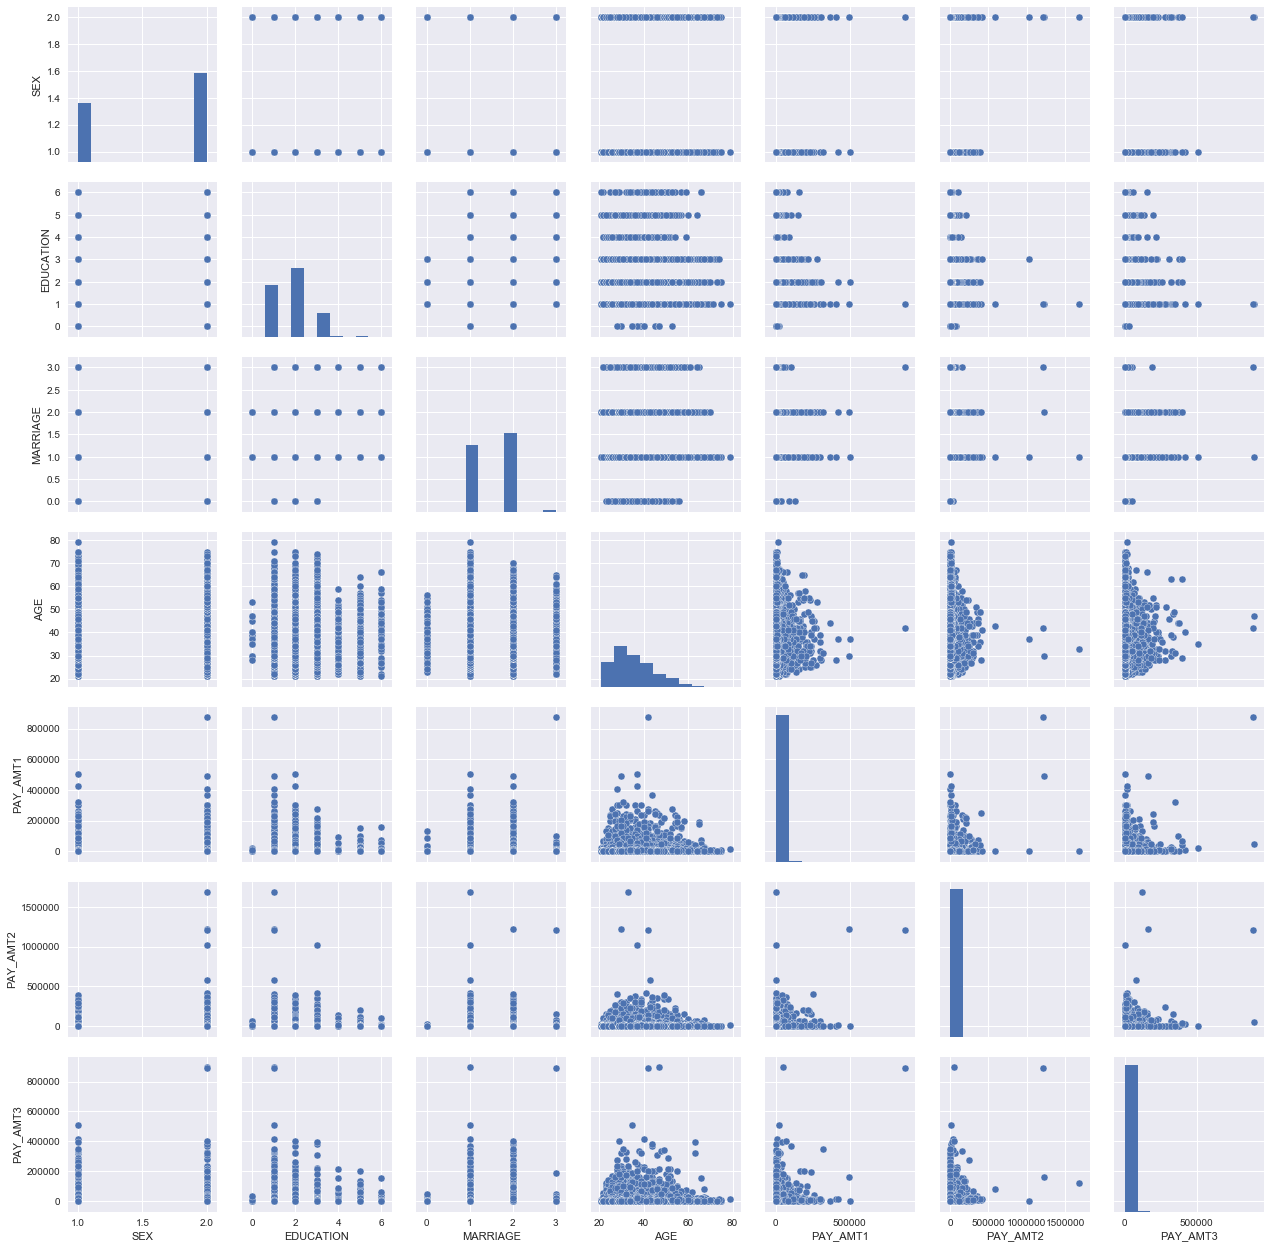

In [11]:
### Visualizing data distribution ###

# plt.xticks = dataset["EDUCATION"].unique()
# plt.scatter(dataset["EDUCATION"], dataset["PAY_AMT5"], color = 'red')

# print(dataset.columns)
sns.pairplot(dataset[['SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 
                      'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3']])

In [36]:
### Data Preprocessing ###

# convert to numpy array
dataset = np.array(dataset)

m = dataset.shape[0] # no. of training examples
# preparing X, adding one_hot encoding wherever needed
X = np.concatenate((
    dataset[:, 0].reshape(m, -1), # limit
    to_categorical(dataset[:, 5]), # pay0
    to_categorical(dataset[:, 6]), # pay2
    to_categorical(dataset[:, 7]), # pay3
    to_categorical(dataset[:, 8]), # pay4
    to_categorical(dataset[:, 9]), # pay5
    dataset[:, 10:23], # bill amount and previous month payment
    to_categorical(dataset[:, 23]) # default payment flag  
), axis=1)

Y_sex = to_categorical(dataset[:, 1])
Y_education = to_categorical(dataset[:, 2])
Y_marriage = to_categorical(dataset[:, 3])
Y_age = dataset[:, 4].reshape(m, -1)
print(X.shape, Y_sex.shape, Y_education.shape, Y_marriage.shape, Y_age.shape)

# print(X[0])
X = normalize(X, axis=1, order=2)
# print(X[0])

(30000, 61) (30000, 3) (30000, 7) (30000, 4) (30000, 1)


In [37]:
### Train and Test set preparation ###

# Splitting into test, train and dev set for each of the demographic label. All demographic labels can also be kept as single Y
X_temp, X_test, Y_education_temp, Y_education_test = train_test_split(X, Y_education, test_size=0.10, random_state=5)
X_train, X_dev, Y_education_train, Y_education_dev = train_test_split(X, Y_education, test_size=0.10, random_state=5)
'''
Note: Final datasets for 'education'(modify above two lines for any other demography) 
            - X_train, Y_education_train, X_dev, Y_education_dev, X_test, Y_education_test
'''

# X and Y for the current run, and their dimensions
X = X_train
Y = Y_education_train
m = X.shape[0] # no. of training examples
n_X = X.shape[1] # no. of features
n_Y = Y.shape[1] # no. of output classes

In [ ]:
# ### Sequential Model ###

# model = Sequential()
# model.add(Dense(units=24, activation='relu', input_dim=n_X))
# # model.add(Dropout(.8))
# model.add(Dense(units=20, activation='relu'))
# # model.add(Dropout(.8))
# model.add(Dense(units=16, activation='relu'))
# # model.add(Dropout(.8))
# model.add(Dense(units=12, activation='relu'))
# # model.add(Dropout(.8))
# model.add(Dense(units=10, activation='relu'))
# # model.add(Dropout(.8))
# model.add(Dense(units=8, activation='relu'))
# # model.add(Dropout(.8))
# model.add(Dense(units=8, activation='relu'))
# # model.add(Dropout(.8))
# model.add(Dense(units=n_Y, activation='softmax'))

# opt = Adam(lr=0.05, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.1)
# model.compile(loss='categorical_crossentropy',
#               optimizer=opt,
#               metrics=['accuracy'])
# model.summary()
# model.fit(X, Y, epochs=2, batch_size=64)

In [40]:
### Dymanic model ###

# clearing session so far, if something is run by mistake
K.clear_session()

# input layer
X_input = Input(shape = (n_X,))
A = X_input

# hidden layer
# list having no. of activations in each layer
layers_dims = [10,8,6]
for dim in layers_dims:
    A = Dense(dim, activation = "relu")(A) # to change activation check here, https://keras.io/activations/
#     A = Dropout(0.7)(A) # add dropout, if needed
    
Y_layer = Dense(n_Y, activation="softmax")(A)
model = Model(inputs = [X_input], outputs = [Y_layer])

# adam optimizer - try different learning rates here
opt = Adam(lr=0.05, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.1)
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
# prints model graph
model.summary()

# training model
model.fit(X, Y, epochs=20, batch_size=64)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 61)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                620       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_4 (Dense)              (None, 7)                 49        
Total params: 811
Trainable params: 811
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
27000/27000 [==============================] - 1s 53us/step - loss: 1.1002 - acc: 0.4941 